# 01. PyTorch Workflow Excercise

Excerise: 
<https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/01_pytorch_workflow_exercises.ipynb>

Solution:
<https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/solutions/01_pytorch_workflow_exercise_solutions.ipynb>

In [8]:
# Last updated
import datetime
print(f"Last updated on: {datetime.datetime.now()}")

Last updated on: 2024-08-10 13:00:49.955715


In [9]:
# Import necessary libraries
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [10]:
# Set up device-agnostic code
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [11]:
# Create the data parameters
weight = 0.3
bias = 0.9

torch.random.manual_seed(42)

# make X and y using linear regression feature
X = torch.randn(100, 1)
y = weight * X + bias

print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[ 1.9269],
        [ 1.4873],
        [ 0.9007],
        [-2.1055],
        [ 0.6784],
        [-1.2345],
        [-0.0431],
        [-1.6047],
        [-0.7521],
        [ 1.6487]])
y: tensor([[1.4781],
        [1.3462],
        [1.1702],
        [0.2683],
        [1.1035],
        [0.5296],
        [0.8871],
        [0.4186],
        [0.6744],
        [1.3946]])


In [12]:
# split the data into training and testing
train_split = int(0.8 * len(X))
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

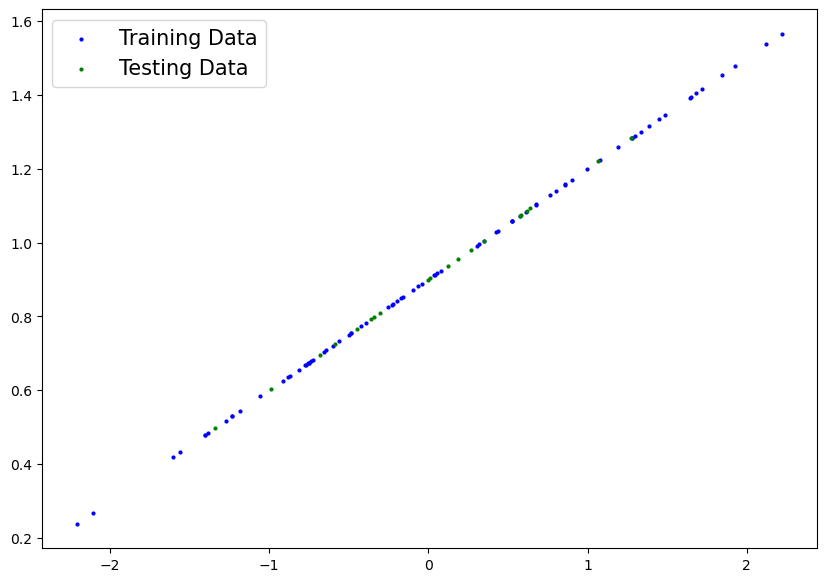

In [13]:
# Plot the training and test data
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c='b', label='Training Data', s=4)
    plt.scatter(test_data, test_labels, c='g', label='Testing Data', s=4)
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions', s=4)
    plt.legend(prop = {'size': 15})

plot_predictions()


## 2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [15]:
# Create Pytorch Linear Regression Model by subclassing nn.Module
class LinearRegression(nn.Module):
    def __init__ (self,):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        
    def forward(self, X):
        return self.weight * X + self

# ## Option 2
# class LinearRegressionModel(nn.Module):
#   def __init__(self):
#     super().__init__()
#     self.linear_layer = nn.Linear(in_features = 1,
#                                   out_features = 1)
#   def forward(self,x : torch.Tensor) -> torch.Tensor:
#     return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegression()
model_1, model_1.state_dict()

(LinearRegression(),
 OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [16]:
next(model_1.parameters()).device

device(type='cpu')

In [17]:
# Instantiate the model and put it to the target device
model_1 = LinearRegression().to(device)
list(model_1.parameters())

[Parameter containing:
 tensor([0.2345], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([0.2303], device='cuda:0', requires_grad=True)]